<a href="https://colab.research.google.com/github/21cb55snigdha/Cognifys-projects-/blob/main/Startup_prediction_using_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the csv file and checking top 5 observations of our dataset.

data=pd.read_csv('50_Startups (3).csv')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# To get overall information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
# No null values are there in this dataset.
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
# checking the shape of data before removing duplicates
data.shape

(50, 4)

In [ ]:
# removing duplicates from this dataset
data.drop_duplicates(keep="first",inplace= True)

In [ ]:
# checking the shape of data after removing duplicates
data.shape

(50, 4)

In [ ]:
# statistical description of the data.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


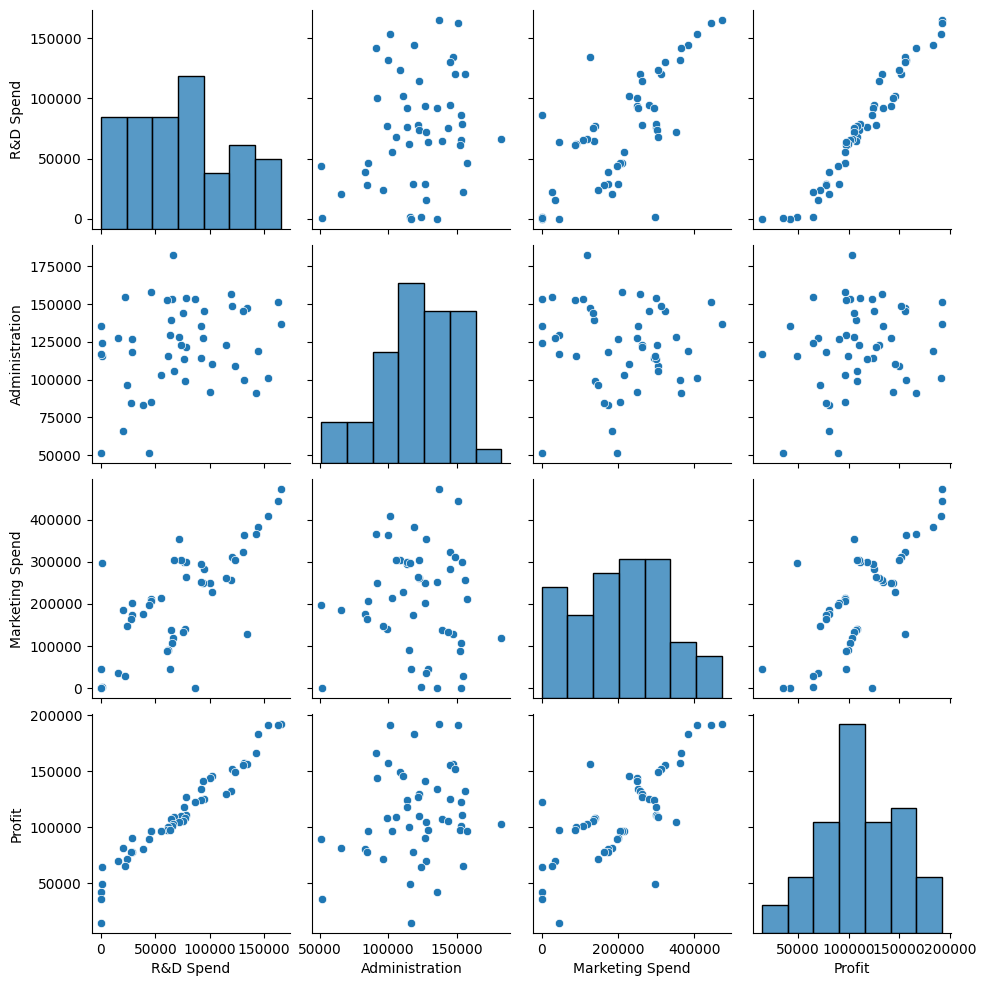

In [ ]:
# Bivariate Analysis
# plotting pairplot to check pairwise relationship between variables.
sns.pairplot(data=data)
plt.show()

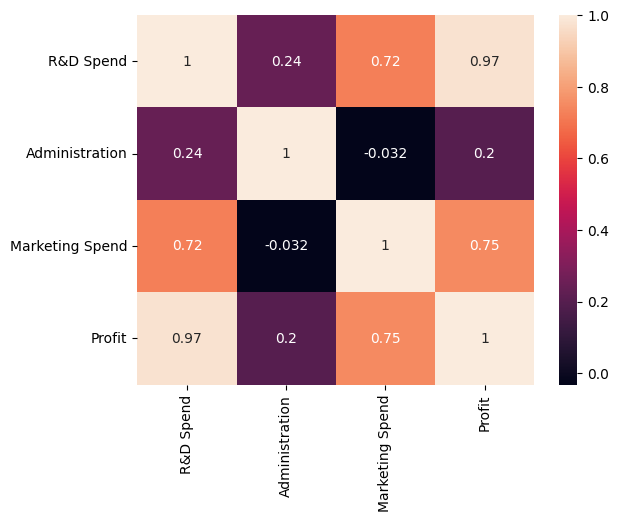

In [ ]:
# plotting heatmap.
sns.heatmap(data.corr(),annot=True)
plt.show()

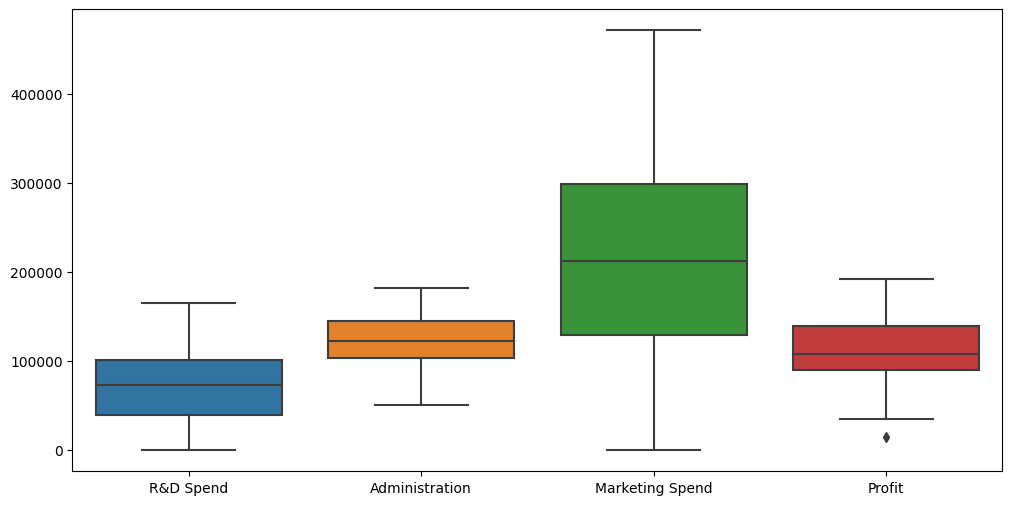

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

In [ ]:
iqr=data["Profit"].quantile(0.75)-data["Profit"].quantile(0.25)
print(iqr)

49627.07499999998


In [ ]:
up=data["Profit"].quantile(0.75)+1.5*iqr
down=data["Profit"].quantile(0.25)-1.5*iqr

print(up,down)

214206.58999999997 15698.290000000023


In [ ]:
outlier=[]
profit=data["Profit"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)

for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)

Down Outlier 14681.4


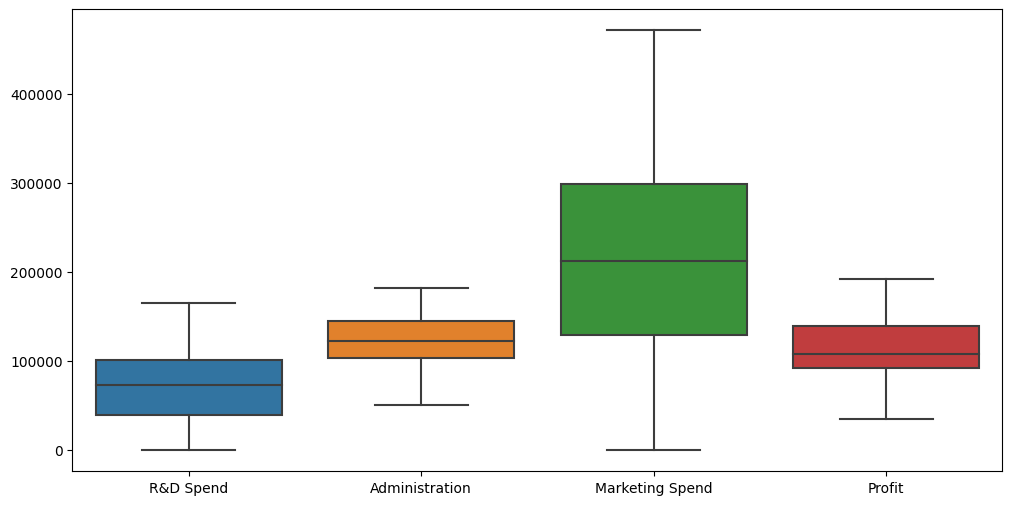

In [ ]:
data["Profit"]=data["Profit"].replace(outlier,data["Profit"].mean())
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()


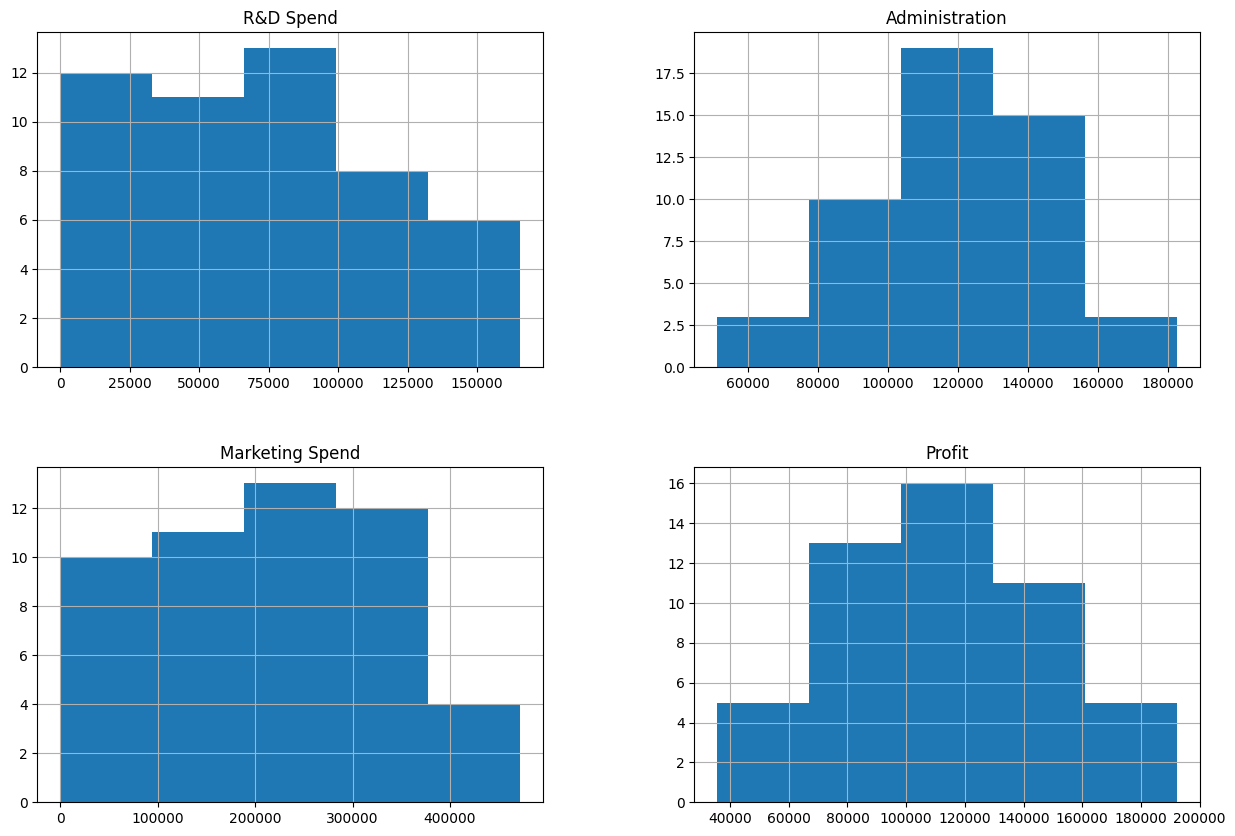

In [ ]:
data.hist(figsize=(15,10),bins=5)
plt.show()

1. ***Splitting the data values into training and testing data ***

In [ ]:
features=data.iloc[:,:-1]
target=data.iloc[:,-1]
features.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [ ]:
target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [ ]:
lr.coef_

array([0.70311246, 0.06615566, 0.02861543])

In [ ]:
pd.DataFrame(lr.coef_,index=features.columns,columns=["Coefficients"])

,Coefficients
R&D Spend,0.703112
Administration,0.066156
Marketing Spend,0.028615


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(ytest,ypred))
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

82303654.55904746
7755.038566102813
0.9237075820048144


In [ ]:
tr=lr.score(xtrain,ytrain)
te=lr.score(xtest,ytest)
print("Traning accuracy",tr)
print("Testing accuracy",te)

Traning accuracy 0.9042770925079766
Testing accuracy 0.9237075820048144


<Axes: xlabel='Profit', ylabel='Density'>

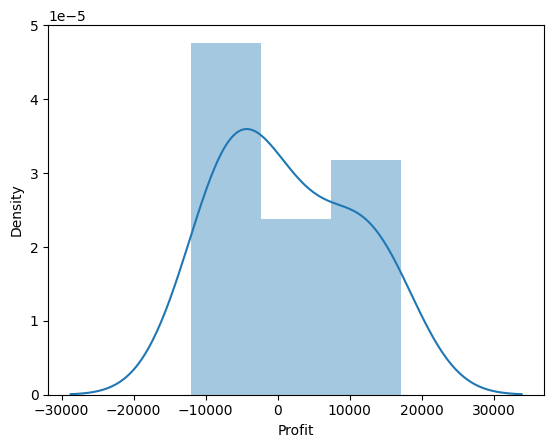

In [ ]:
sns.distplot(ytest-ypred)

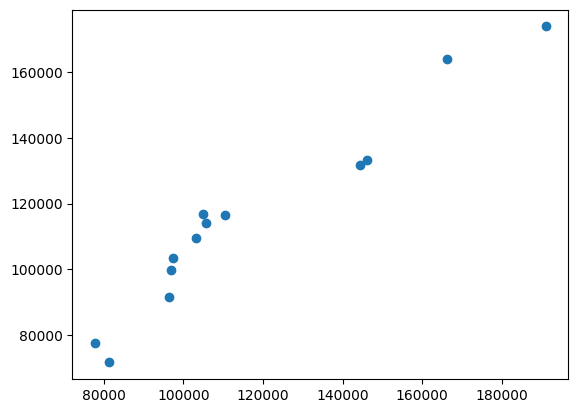

In [ ]:
plt.scatter(ytest,ypred)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
import seaborn as sns
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='seismic',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
companies = pd.read_csv("50_Startups (3).csv")
companies.head(2)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [ ]:
print(f'\033[96m')
print(companies.shape)
print(companies.size)


(50, 4)
200


In [ ]:
print(f'\033[95m')
companies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


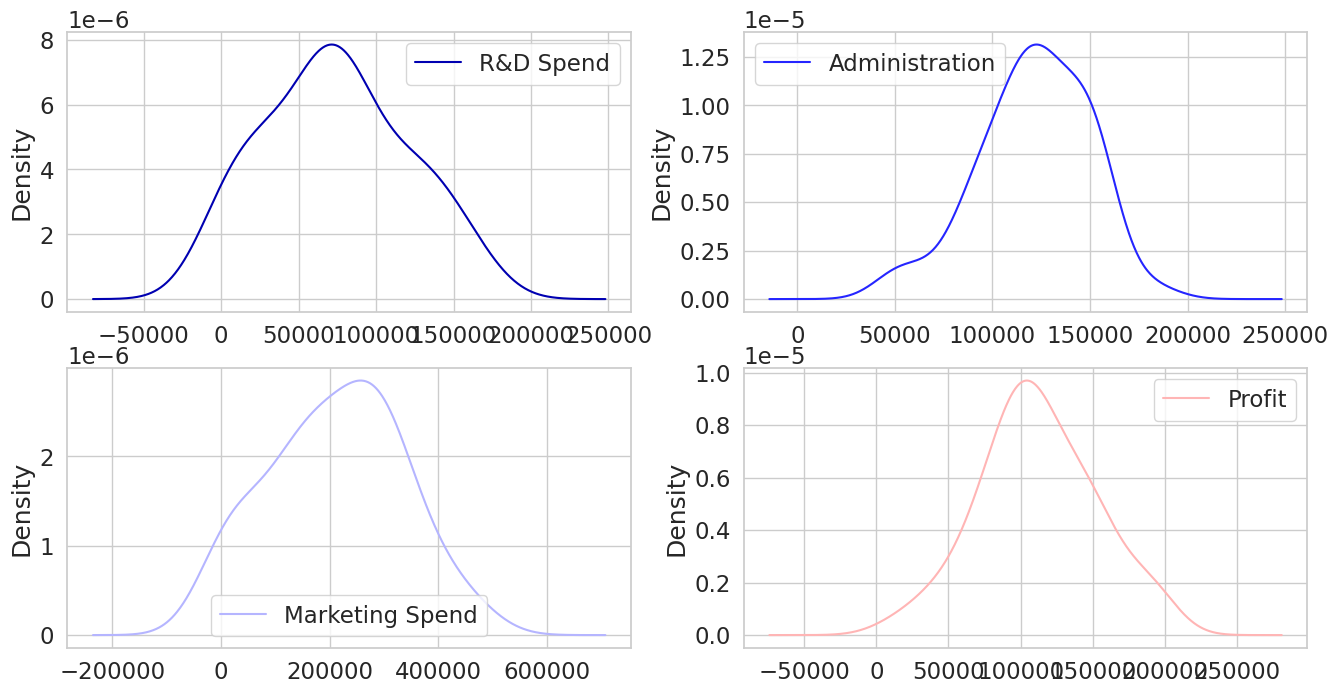

In [ ]:
companies.plot(kind='kde', subplots=True, layout=(2,2), sharex=False, figsize= (16,8))
plt.show()

In [ ]:
# Correlation Matrix

companies_correlation = companies.corr()
companies_correlation['Profit'].sort_values(ascending=False)

Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64

In [ ]:
!pip install category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(['State'])
companies_encoded = encoder.fit_transform(companies)
companies_encoded.head(2)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [ ]:
X = companies_encoded.drop(["Profit"],axis=1)
y = companies_encoded['Profit']

In [ ]:
X = companies_encoded.drop(["Profit"],axis=1)
y = companies_encoded['Profit']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

2.DIFFERENT REGRESSION ALGORITHMS:

1. **LinearRegression,**
2. **LassoRegression,**
3. **RidgeRegression,**
4. **ElasticNetRegressor,**
5. **XGBRegressor,**
6. **RandomForestRegressor,**
7. **KNeighborsRegressor,**
8. **BaggingRegressor,**
9. **HistGradientBoostingRegressor,**
10. **ExtraTreesRegressor,**
11. **HuberRegressor,**
12. **AdaBoostRegressor,**
13. **MLPRegressor,**
14. **BayesianRidge,**

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)

# Finally, predict on test data
pred_test_LinearRegression = model_LinearRegression.predict(X_test)

r2_test_LinearRegression = r2_score(y_test, pred_test_LinearRegression).round(4)
mse_test_LinearRegression = mean_squared_error(y_test, pred_test_LinearRegression).round(4)
rmse_test_LinearRegression = np.sqrt(mean_squared_error(y_test, pred_test_LinearRegression)).round(4)
mae_test_LinearRegression = mean_absolute_error(y_test, pred_test_LinearRegression).round(4)

print(f'\033[94m')
print('R2 Score : ', r2_test_LinearRegression)
print(f'\033[92m')
print('MSE      : ', mse_test_LinearRegression)
print('RMSE     : ', rmse_test_LinearRegression)
print('MAE      : ', mae_test_LinearRegression)


R2 Score :  0.9511

MSE      :  62357479.6176
RMSE     :  7896.6752
MAE      :  6472.0626


In [ ]:
#LassoRegression
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 0.8)
model_lasso.fit(X_train, y_train)

# Finally, predict on test data
pred_test_lasso = model_lasso.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso).round(4)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso).round(4)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, pred_test_lasso)).round(4)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_lasso)
print(f'\033[92m')
print('MSE       : ', mse_test_lasso)
print('RMSE      : ', rmse_test_lasso)
print('MAE       : ', mae_test_lasso)


R2 Score  :  0.9511

MSE       :  62357479.2203
RMSE      :  7896.6752
MAE       :  6472.0626


In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge

model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)

# Finally, predict on test data
pred_test_Ridge = model_Ridge.predict(X_test)

r2_test_Ridge = r2_score(y_test, pred_test_Ridge).round(4)
mse_test_Ridge = mean_squared_error(y_test, pred_test_Ridge).round(4)
rmse_test_Ridge = np.sqrt(mean_squared_error(y_test, pred_test_Ridge)).round(4)
mae_test_Ridge = mean_absolute_error(y_test, pred_test_Ridge).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_Ridge)
print(f'\033[92m')
print('MSE       : ', mse_test_Ridge)
print('RMSE      : ', rmse_test_Ridge)
print('MAE       : ', mae_test_Ridge)


R2 Score  :  0.9511

MSE       :  62357479.6217
RMSE      :  7896.6752
MAE       :  6472.0626


In [ ]:
#XGB REGRESSION
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Finally, predict on test data
pred_test_xgb = model_xgb.predict(X_test)

r2_test_xgb = r2_score(y_test, pred_test_xgb).round(4)
mse_test_xgb = mean_squared_error(y_test, pred_test_xgb).round(4)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, pred_test_xgb)).round(4)
mae_test_xgb = mean_absolute_error(y_test, pred_test_xgb).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_xgb)
print(f'\033[92m')
print('MSE       : ', mse_test_xgb)
print('RMSE      : ', rmse_test_xgb)
print('MAE       : ', mae_test_xgb)



R2 Score  :  0.9095

MSE       :  115308087.8922
RMSE      :  10738.1604
MAE       :  8647.3134


In [ ]:
#ELASTIC NET REGRESSION
from sklearn.linear_model import  ElasticNet
model_ElasticNet = ElasticNet()
model_ElasticNet.fit(X_train, y_train)

# Finally, predict on test data
pred_test_ElasticNet = model_ElasticNet.predict(X_test)

r2_test_ElasticNet = r2_score(y_test, pred_test_ElasticNet).round(4)
mse_test_ElasticNet = mean_squared_error(y_test, pred_test_ElasticNet).round(4)
rmse_test_ElasticNet = np.sqrt(mean_squared_error(y_test, pred_test_ElasticNet)).round(4)
mae_test_ElasticNet = mean_absolute_error(y_test, pred_test_ElasticNet).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_ElasticNet)
print(f'\033[92m')
print('MSE       : ', mse_test_ElasticNet)
print('RMSE      : ', rmse_test_ElasticNet)
print('MAE       : ', mae_test_ElasticNet)


R2 Score  :  0.9511

MSE       :  62357479.4535
RMSE      :  7896.6752
MAE       :  6472.0626


In [ ]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor()
model_RandomForestRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_RandomForestRegressor = model_RandomForestRegressor.predict(X_test)

r2_test_RandomForestRegressor = r2_score(y_test, pred_test_RandomForestRegressor).round(4)
mse_test_RandomForestRegressor = mean_squared_error(y_test, pred_test_RandomForestRegressor).round(4)
rmse_test_RandomForestRegressor = np.sqrt(mean_squared_error(y_test, pred_test_RandomForestRegressor)).round(4)
mae_test_RandomForestRegressor = mean_absolute_error(y_test, pred_test_RandomForestRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_RandomForestRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_RandomForestRegressor)
print('RMSE      : ', rmse_test_RandomForestRegressor)
print('MAE       : ', mae_test_RandomForestRegressor)


R2 Score  :  0.9476

MSE       :  66819534.4162
RMSE      :  8174.3216
MAE       :  6706.444


In [ ]:
#KNN NEIGHBOUR REGRESSION
from sklearn.neighbors import KNeighborsRegressor

model_KNeighborsRegressor = KNeighborsRegressor()
model_KNeighborsRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_KNeighborsRegressor = model_KNeighborsRegressor.predict(X_test)

r2_test_KNeighborsRegressor = r2_score(y_test, pred_test_KNeighborsRegressor).round(4)
mse_test_KNeighborsRegressor = mean_squared_error(y_test, pred_test_KNeighborsRegressor).round(4)
rmse_test_KNeighborsRegressor = np.sqrt(mean_squared_error(y_test, pred_test_KNeighborsRegressor)).round(4)
mae_test_KNeighborsRegressor = mean_absolute_error(y_test, pred_test_KNeighborsRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_KNeighborsRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_KNeighborsRegressor)
print('RMSE      : ', rmse_test_KNeighborsRegressor)
print('MAE       : ', mae_test_KNeighborsRegressor)


R2 Score  :  0.7894

MSE       :  268235087.7682
RMSE      :  16377.8841
MAE       :  12449.904


In [ ]:
#BAGGING REGRESSION
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
model_BaggingRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_BaggingRegressor = model_BaggingRegressor.predict(X_test)

r2_test_BaggingRegressor = r2_score(y_test, pred_test_BaggingRegressor).round(4)
mse_test_BaggingRegressor = mean_squared_error(y_test, pred_test_BaggingRegressor).round(4)
rmse_test_BaggingRegressor = np.sqrt(mean_squared_error(y_test, pred_test_BaggingRegressor)).round(4)
mae_test_BaggingRegressor = mean_absolute_error(y_test, pred_test_BaggingRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_BaggingRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_BaggingRegressor)
print('RMSE      : ', rmse_test_BaggingRegressor)
print('MAE       : ', mae_test_BaggingRegressor)


R2 Score  :  0.9642

MSE       :  45647774.0869
RMSE      :  6756.3136
MAE       :  5718.3597


In [ ]:
#HISTGRADIENT BOOSSTING REGRESSION
from sklearn.ensemble import HistGradientBoostingRegressor

model_HistGradientBoostingRegressor = HistGradientBoostingRegressor()
model_HistGradientBoostingRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_HistGradientBoostingRegressor = model_HistGradientBoostingRegressor.predict(X_test)

r2_test_HistGradientBoostingRegressor = r2_score(y_test, pred_test_HistGradientBoostingRegressor).round(4)
mse_test_HistGradientBoostingRegressor = mean_squared_error(y_test, pred_test_HistGradientBoostingRegressor).round(4)
rmse_test_HistGradientBoostingRegressor = np.sqrt(mean_squared_error(y_test, pred_test_HistGradientBoostingRegressor)).round(4)
mae_test_HistGradientBoostingRegressor = mean_absolute_error(y_test, pred_test_HistGradientBoostingRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_HistGradientBoostingRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_HistGradientBoostingRegressor)
print('RMSE      : ', rmse_test_HistGradientBoostingRegressor)
print('MAE       : ', mae_test_HistGradientBoostingRegressor)



R2 Score  :  -0.0001

MSE       :  1274145106.9866
RMSE      :  35695.1692
MAE       :  26315.4752


In [ ]:
#EXTRATREES REGRESSION
from sklearn.ensemble import ExtraTreesRegressor

model_ExtraTreesRegressor = ExtraTreesRegressor()
model_ExtraTreesRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_ExtraTreesRegressor = model_ExtraTreesRegressor.predict(X_test)

r2_test_ExtraTreesRegressor = r2_score(y_test, pred_test_ExtraTreesRegressor).round(4)
mse_test_ExtraTreesRegressor = mean_squared_error(y_test, pred_test_ExtraTreesRegressor).round(4)
rmse_test_ExtraTreesRegressor = np.sqrt(mean_squared_error(y_test, pred_test_ExtraTreesRegressor)).round(4)
mae_test_ExtraTreesRegressor= mean_absolute_error(y_test, pred_test_ExtraTreesRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_ExtraTreesRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_ExtraTreesRegressor)
print('RMSE      : ', rmse_test_ExtraTreesRegressor)
print('MAE       : ', mae_test_ExtraTreesRegressor)


R2 Score  :  0.9508

MSE       :  62709568.7597
RMSE      :  7918.9374
MAE       :  5961.0003


In [ ]:
#ADA BOOST REGRESSION
from sklearn.ensemble import AdaBoostRegressor

model_AdaBoostRegressor = AdaBoostRegressor()
model_AdaBoostRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_AdaBoostRegressor = model_AdaBoostRegressor.predict(X_test)

r2_test_AdaBoostRegressor = r2_score(y_test, pred_test_AdaBoostRegressor).round(4)
mse_test_AdaBoostRegressor = mean_squared_error(y_test, pred_test_AdaBoostRegressor).round(4)
rmse_test_AdaBoostRegressor = np.sqrt(mean_squared_error(y_test, pred_test_AdaBoostRegressor)).round(4)
mae_test_AdaBoostRegressor= mean_absolute_error(y_test, pred_test_AdaBoostRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_AdaBoostRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_AdaBoostRegressor)
print('RMSE      : ', rmse_test_AdaBoostRegressor)
print('MAE       : ', mae_test_AdaBoostRegressor)


R2 Score  :  0.9157

MSE       :  107390479.4071
RMSE      :  10362.9378
MAE       :  7610.4772


In [ ]:
#MLP REGRESSION
from sklearn.neural_network import MLPRegressor

model_MLPRegressor = MLPRegressor()
model_MLPRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_MLPRegressor = model_MLPRegressor.predict(X_test)

r2_test_MLPRegressor = r2_score(y_test, pred_test_MLPRegressor).round(4)
mse_test_MLPRegressor = mean_squared_error(y_test, pred_test_MLPRegressor).round(4)
rmse_test_MLPRegressor = np.sqrt(mean_squared_error(y_test, pred_test_MLPRegressor)).round(4)
mae_test_MLPRegressor= mean_absolute_error(y_test, pred_test_MLPRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_MLPRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_MLPRegressor)
print('RMSE      : ', rmse_test_MLPRegressor)
print('MAE       : ', mae_test_MLPRegressor)


R2 Score  :  0.859

MSE       :  179577525.4401
RMSE      :  13400.6539
MAE       :  11815.5645


In [ ]:
#HUBER REGRESSOR
from sklearn.linear_model import HuberRegressor

model_HuberRegressor = HuberRegressor()
model_HuberRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_HuberRegressor = model_HuberRegressor.predict(X_test)

r2_test_HuberRegressor = r2_score(y_test, pred_test_HuberRegressor).round(4)
mse_test_HuberRegressor = mean_squared_error(y_test, pred_test_HuberRegressor).round(4)
rmse_test_HuberRegressor = np.sqrt(mean_squared_error(y_test, pred_test_HuberRegressor)).round(4)
mae_test_HuberRegressor= mean_absolute_error(y_test, pred_test_HuberRegressor).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_HuberRegressor)
print(f'\033[92m')
print('MSE       : ', mse_test_HuberRegressor)
print('RMSE      : ', rmse_test_HuberRegressor)
print('MAE       : ', mae_test_HuberRegressor)




R2 Score  :  0.8398

MSE       :  204047924.5163
RMSE      :  14284.5345
MAE       :  12131.7868


In [ ]:
#BAYESIAN RIDGE REGRESSION
from sklearn.linear_model import BayesianRidge

model_BayesianRidge = BayesianRidge()
model_BayesianRidge.fit(X_train, y_train)

# Finally, predict on test data
pred_test_BayesianRidge = model_BayesianRidge.predict(X_test)

r2_test_BayesianRidge = r2_score(y_test, pred_test_BayesianRidge).round(4)
mse_test_BayesianRidge = mean_squared_error(y_test, pred_test_BayesianRidge).round(4)
rmse_test_BayesianRidge = np.sqrt(mean_squared_error(y_test, pred_test_BayesianRidge)).round(4)
mae_test_BayesianRidge= mean_absolute_error(y_test, pred_test_BayesianRidge).round(4)

print(f'\033[94m')
print('R2 Score  : ', r2_test_BayesianRidge)
print(f'\033[92m')
print('MSE       : ', mse_test_BayesianRidge)
print('RMSE      : ', rmse_test_BayesianRidge)
print('MAE       : ', mae_test_BayesianRidge)



R2 Score  :  0.9495

MSE       :  64397950.9393
RMSE      :  8024.8334
MAE       :  6631.7504


***3.Comparing the regression models ***

**Best Performing Model : XGBRegressor**

In [ ]:
print(f'\033[94m')
prediction = model_xgb.predict(X_test)
print(prediction)


[158185.33   73566.164  74653.28  104040.91  144902.78  182647.22
 101241.445  97012.31  141986.95   18155.809  91240.08  128152.57
 123980.02  138973.05  101413.02 ]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
7,155752.60,158185.328125
44,65200.33,73566.164062
43,69758.98,74653.281250
25,107404.34,104040.906250
14,132602.65,144902.781250


In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
7,155752.60,158185.328125,-2432.728125
44,65200.33,73566.164062,-8365.834062
43,69758.98,74653.281250,-4894.301250
25,107404.34,104040.906250,3363.433750
14,132602.65,144902.781250,-12300.131250


In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(7).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
43,69758.980000,74653.281250,-4894.301250
21,111313.020000,128152.570312,-16839.550312
44,65200.330000,73566.164062,-8365.834062
14,132602.650000,144902.781250,-12300.131250
7,155752.600000,158185.328125,-2432.728125
17,125370.370000,141986.953125,-16616.583125
19,122776.860000,123980.023438,-1203.163437
